In [ ]:
import cv2
import os

# Load video file
video_path = '1.mp4'
cap = cv2.VideoCapture(video_path)
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Extract frames and save them
frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_path = os.path.join(output_dir, f"frame_{frame_num:04d}.png")
    cv2.imwrite(frame_path, frame)
    frame_num += 1

cap.release()
print(f"Total frames extracted: {frame_num}")


Total frames extracted: 1048


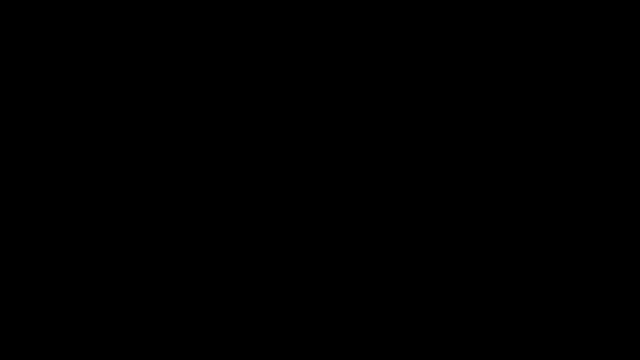

In [ ]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Function for basic color thresholding for segmentation
def color_threshold_segmentation(frame, lower_color, upper_color):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_color, upper_color)
    segmented = cv2.bitwise_and(frame, frame, mask=mask)
    return segmented


frame_path = os.path.join(output_dir, 'frame_0000.png')
frame = cv2.imread(frame_path)

# Define color range for thresholding (example for green color in HSV)
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

segmented_frame = color_threshold_segmentation(frame, lower_green, upper_green)


segmented_frame_path = os.path.join(output_dir, 'segmented_frame_0000.png')
cv2.imwrite(segmented_frame_path, segmented_frame)


cv2_imshow(segmented_frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def detect_scene_cuts(video_path, threshold=30.0):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()  # Read the first frame
    prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    scene_cuts = []
    frame_num = 1

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Convert current frame to grayscale for pixel-based comparison
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Calculate pixel-wise absolute difference
        diff = cv2.absdiff(prev_frame, gray_frame)

        # Compute the mean of pixel differences
        mean_diff = np.mean(diff)

        if mean_diff > threshold:
            scene_cuts.append(frame_num)

        prev_frame = gray_frame
        frame_num += 1

    cap.release()
    return scene_cuts


scene_cuts = detect_scene_cuts(video_path, threshold=30.0)
print(f"Scene cuts detected at frames: {scene_cuts}")


Scene cuts detected at frames: [283, 312, 313, 888, 980]


Scene cuts detected at frames: [283, 312, 313, 888, 980]


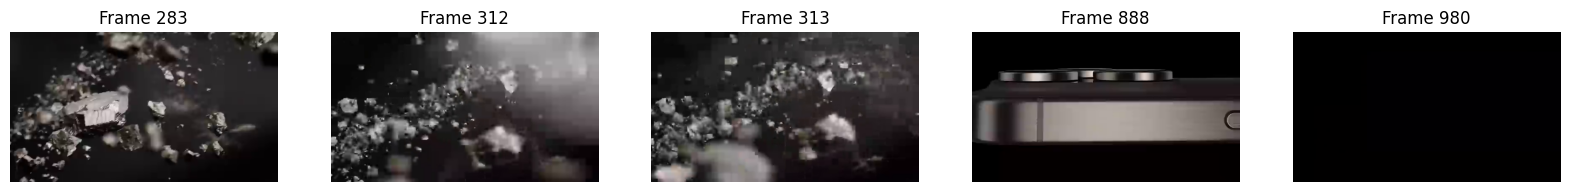

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Function to detect scene cuts
def detect_scene_cuts(video_path, threshold=30.0):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()  # Read the first frame
    prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    scene_cuts = []
    frame_num = 1

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Convert current frame to grayscale for pixel-based comparison
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Calculate pixel-wise absolute difference
        diff = cv2.absdiff(prev_frame, gray_frame)

        # Compute the mean of pixel differences
        mean_diff = np.mean(diff)

        if mean_diff > threshold:
            scene_cuts.append((frame_num, frame))

        prev_frame = gray_frame
        frame_num += 1

    cap.release()
    return scene_cuts

# Display function for the scene cut frames
def display_scene_cut_frames(scene_cuts, num_frames=5):
    # Limit the number of frames to display to 'num_frames'
    scene_cut_frames = scene_cuts[:num_frames]
    fig, axs = plt.subplots(1, len(scene_cut_frames), figsize=(20, 5))

    for i, (frame_num, frame) in enumerate(scene_cut_frames):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        axs[i].imshow(frame_rgb)
        axs[i].set_title(f"Frame {frame_num}")
        axs[i].axis('off')

    plt.show()

# Detect scene cuts and get the frames
scene_cuts = detect_scene_cuts(video_path, threshold=30.0)
print(f"Scene cuts detected at frames: {[frame_num for frame_num, _ in scene_cuts]}")

# Display the first 5 scene cut frames
display_scene_cut_frames(scene_cuts, num_frames=5)


In [ ]:
def mark_scene_cuts(video_path, scene_cuts, output_dir="marked_frames"):
    cap = cv2.VideoCapture(video_path)
    os.makedirs(output_dir, exist_ok=True)

    frame_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # If the current frame is a scene cut, mark it
        if frame_num in scene_cuts:
            # Add a red rectangle or border to indicate a scene cut
            cv2.rectangle(frame, (10, 10), (frame.shape[1] - 10, frame.shape[0] - 10), (0, 0, 255), 5)
            marked_frame_path = os.path.join(output_dir, f"scene_cut_frame_{frame_num:04d}.png")
            cv2.imwrite(marked_frame_path, frame)

        frame_num += 1

    cap.release()
    print(f"Marked frames saved in {output_dir}")

# Mark the detected scene cuts on the frames
mark_scene_cuts(video_path, scene_cuts)


Marked frames saved in marked_frames


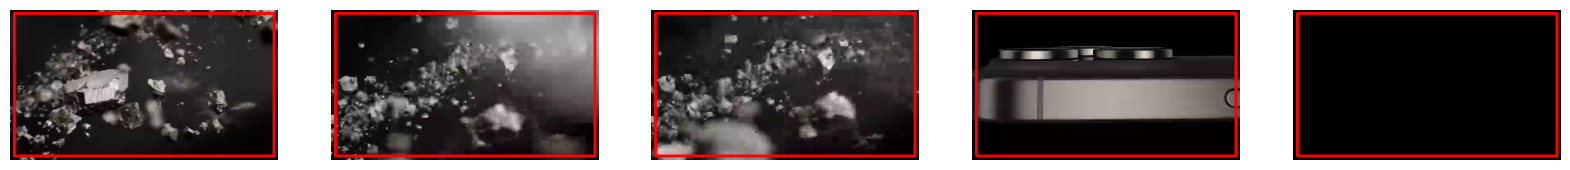

In [ ]:
import matplotlib.pyplot as plt

# Function to display frames with scene cuts
def display_scene_cuts(scene_cut_frames, num_frames=5):
    fig, axs = plt.subplots(1, num_frames, figsize=(20, 5))

    for i, frame_path in enumerate(scene_cut_frames[:num_frames]):
        frame = cv2.imread(frame_path)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        axs[i].imshow(frame_rgb)
        axs[i].axis('off')

    plt.show()

# Get the paths of marked frames for visualization
marked_frame_paths = [os.path.join("marked_frames", f"scene_cut_frame_{frame_num:04d}.png") for frame_num in scene_cuts]

# Display the marked frames
display_scene_cuts(marked_frame_paths, num_frames=5)


Input:

Upload a video file.
Frame Extraction:

Open video and save each frame to a directory.
Scene Cut Detection:

Open video.
For each frame:
Convert to grayscale and calculate histogram.
Compare with previous histogram:
Mark hard or soft cuts.
Save marked frames.
Segmentation:

Open video.
For each frame:
Apply edge detection and background subtraction.
Save segmented frames.
Visualization:

For each detected cut frame:
Display marked frame, edge frame, and foreground mask.
Output:
Visual results showing scene cuts and segmentation.

Saving iPhone 15 Pro Reveal (4K).mp4 to iPhone 15 Pro Reveal (4K).mp4
Extracted 1048 frames to /content/extracted_frames
Detected Hard Cuts at Frames: [16, 218, 224, 313, 600, 631, 808, 828, 840, 843, 844, 990, 1020]
Detected Soft Cuts at Frames: [16, 218, 224, 313, 600, 631, 828, 840, 843, 844, 990]
Scene Boundaries: [16, 16, 218, 218, 224, 224, 313, 313, 600, 600, 631, 631, 808, 828, 828, 840, 840, 843, 843, 844, 844, 990, 990, 1020]


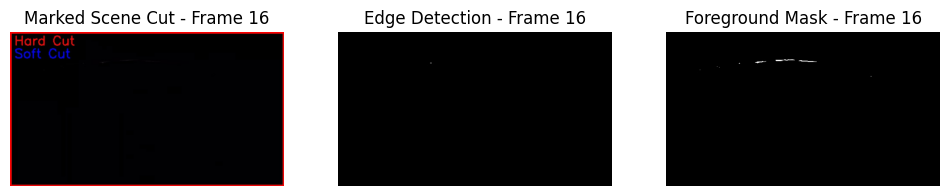

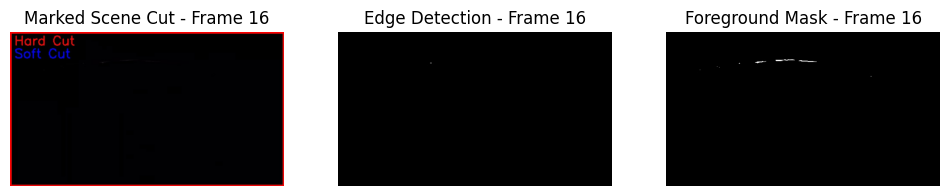

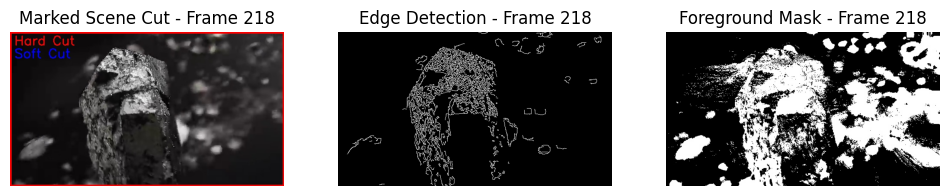

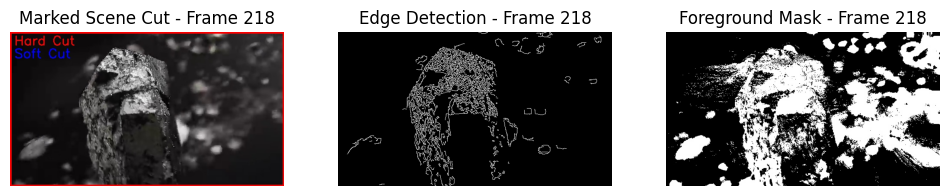

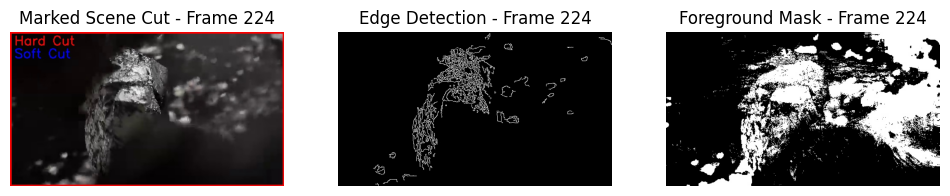

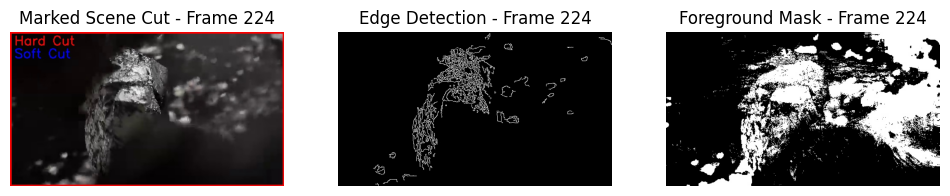

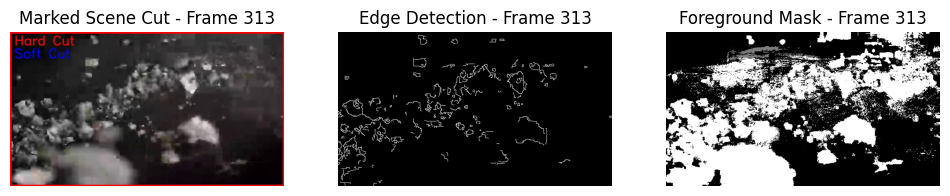

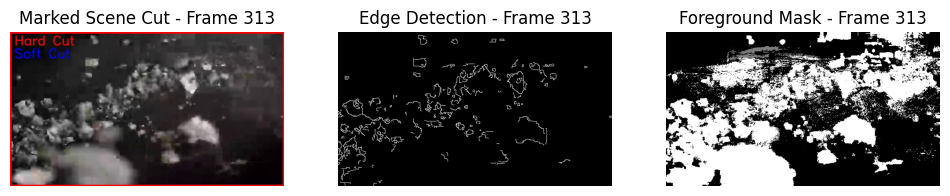

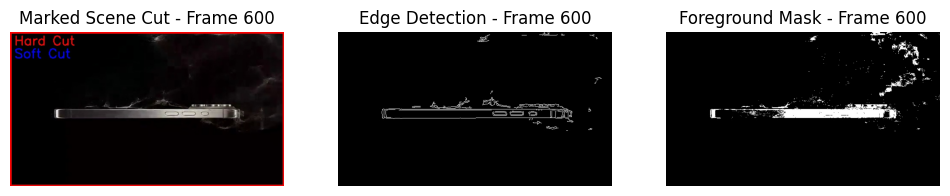

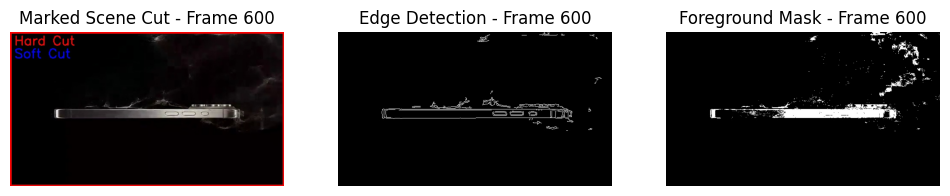

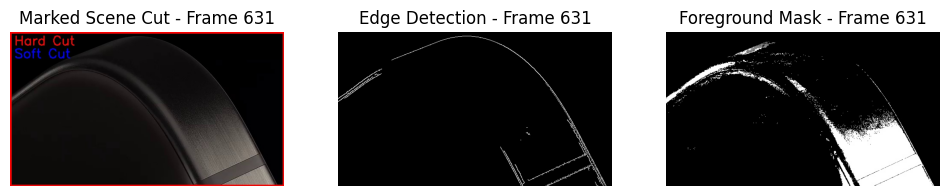

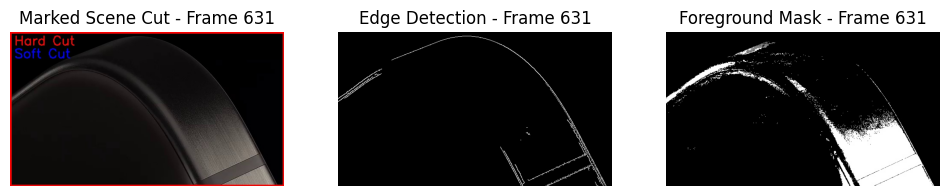

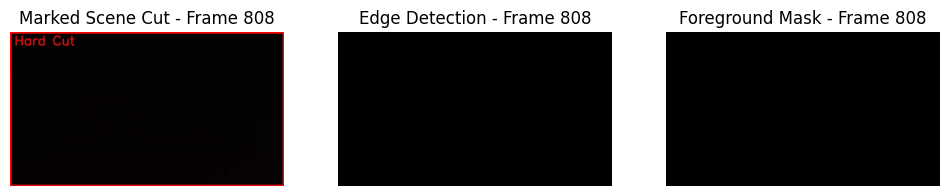

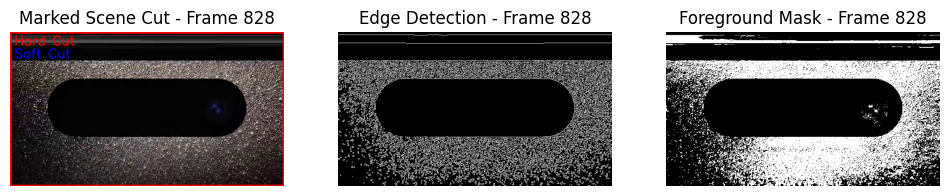

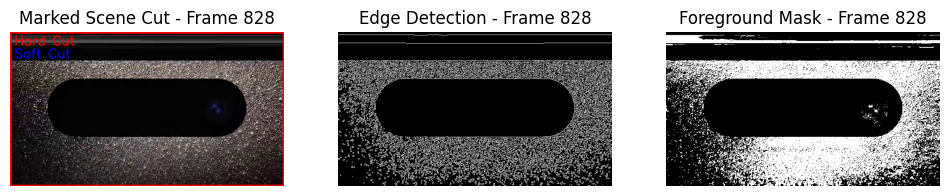

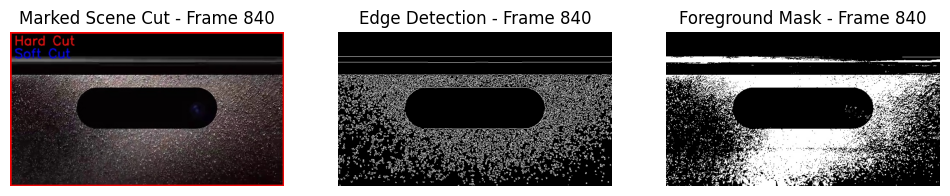

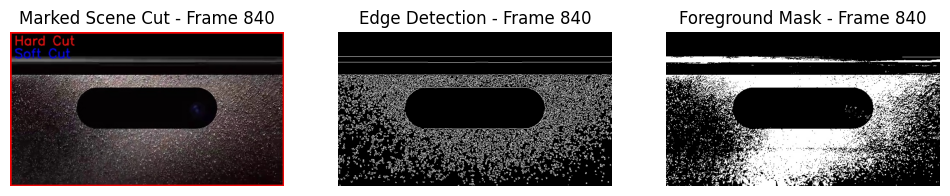

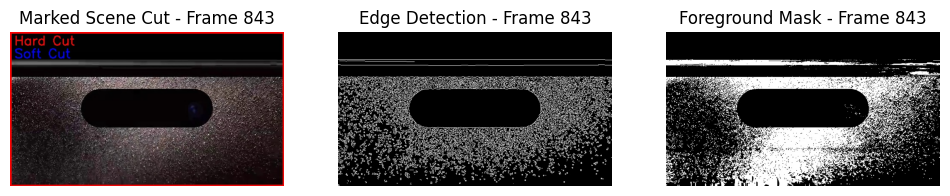

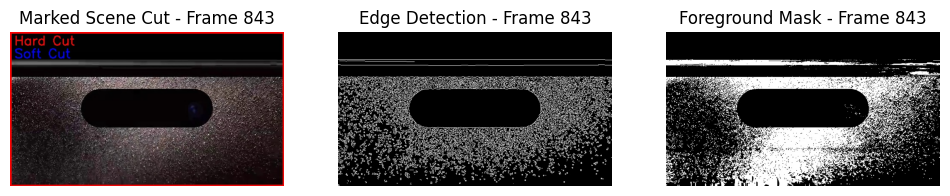

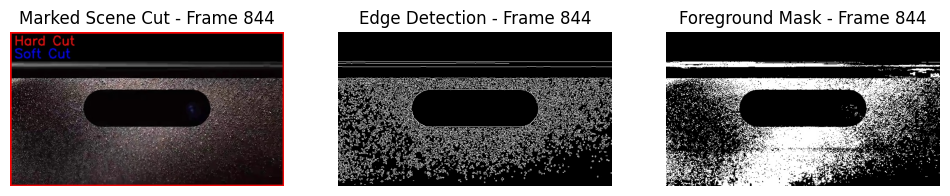

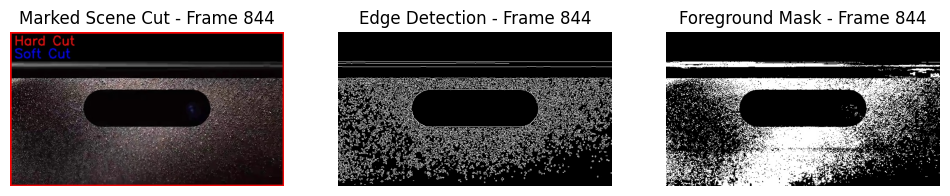

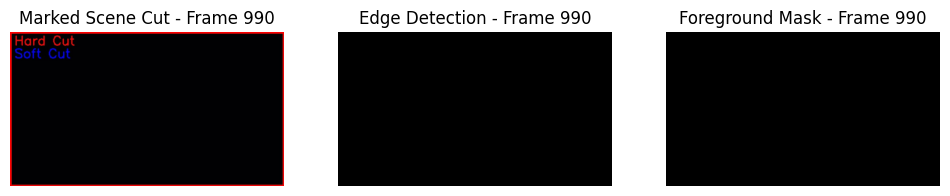

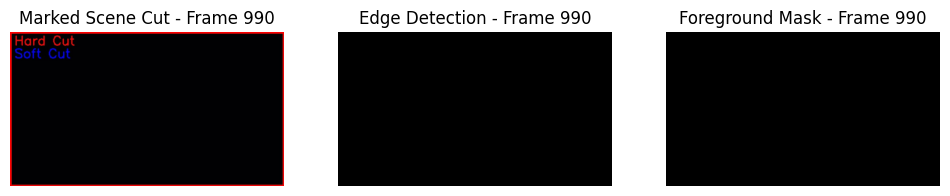

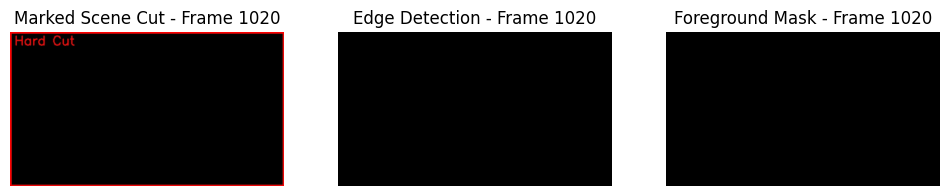

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import files

# Upload your video file here
uploaded = files.upload()

# Set the video path to the uploaded file name
video_path = list(uploaded.keys())[0]  # Get the uploaded video file name

# Paths for output folders
extracted_frames_folder = '/content/extracted_frames'
segmented_output_folder = '/content/segmented_frames'
marked_output_folder = '/content/marked_scene_cuts'

# Create output folders if they don't exist
for folder in [extracted_frames_folder, segmented_output_folder, marked_output_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Load the video and extract frames
cap = cv2.VideoCapture(video_path)
frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Save extracted frames
    extracted_filename = os.path.join(extracted_frames_folder, f'frame_{frame_number:04d}.jpg')
    cv2.imwrite(extracted_filename, frame)

    frame_number += 1

cap.release()
print(f"Extracted {frame_number} frames to {extracted_frames_folder}")

# Scene cut detection and segmentation
cap = cv2.VideoCapture(video_path)
frame_number = 0
prev_hist = None

# Thresholds for hard and soft cut detection
hard_cut_threshold = 0.7
soft_cut_threshold = 0.05

# To store detected cuts and scene boundaries
hard_cuts = []
soft_cuts = []
scene_boundaries = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate histogram (normalized)
    hist = cv2.calcHist([gray_frame], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    if prev_hist is not None:
        # Compute histogram difference between consecutive frames
        hist_diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_CORREL)

        # Hard cut detection
        if hist_diff < hard_cut_threshold:
            hard_cuts.append(frame_number)
            scene_boundaries.append(frame_number)
            # Mark hard cut on the frame
            cv2.putText(frame, 'Hard Cut', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 0, 255), 5)

        # Soft cut detection (gradual changes)
        if soft_cut_threshold < hist_diff < hard_cut_threshold:
            soft_cuts.append(frame_number)
            scene_boundaries.append(frame_number)
            # Mark soft cut on the frame
            cv2.putText(frame, 'Soft Cut', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Save marked frame
    marked_filename = os.path.join(marked_output_folder, f'marked_frame_{frame_number:04d}.jpg')
    cv2.imwrite(marked_filename, frame)

    prev_hist = hist
    frame_number += 1

cap.release()

print(f"Detected Hard Cuts at Frames: {hard_cuts}")
print(f"Detected Soft Cuts at Frames: {soft_cuts}")
print(f"Scene Boundaries: {scene_boundaries}")

# Segmentation using Canny edge detection and background subtraction
cap = cv2.VideoCapture(video_path)
frame_number = 0
back_sub = cv2.createBackgroundSubtractorMOG2()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Edge detection using Canny
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_frame, 100, 200)

    # Foreground-Background segmentation using MOG2
    fg_mask = back_sub.apply(frame)

    # Save segmented frames
    edge_filename = os.path.join(segmented_output_folder, f'edge_frame_{frame_number:04d}.jpg')
    fg_filename = os.path.join(segmented_output_folder, f'foreground_frame_{frame_number:04d}.jpg')

    cv2.imwrite(edge_filename, edges)
    cv2.imwrite(fg_filename, fg_mask)

    frame_number += 1

cap.release()

# Visualization of marked scene cuts and segmentation results
for cut_frame in scene_boundaries:
    # Read marked frame
    marked_frame = cv2.imread(os.path.join(marked_output_folder, f'marked_frame_{cut_frame:04d}.jpg'))

    # Read segmented results (edge detection and foreground)
    edge_frame = cv2.imread(os.path.join(segmented_output_folder, f'edge_frame_{cut_frame:04d}.jpg'))
    fg_frame = cv2.imread(os.path.join(segmented_output_folder, f'foreground_frame_{cut_frame:04d}.jpg'))

    # Display results using matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 3, 1)
    plt.title(f'Marked Scene Cut - Frame {cut_frame}')
    plt.imshow(cv2.cvtColor(marked_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f'Edge Detection - Frame {cut_frame}')
    plt.imshow(cv2.cvtColor(edge_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f'Foreground Mask - Frame {cut_frame}')
    plt.imshow(cv2.cvtColor(fg_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()
